importing all required packages and reading the csv file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('google_drive_nanreplaced.csv')

In [3]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


The distributions is about the numbers of forms created and the number of forms edited on google drive on a day. 

Reading the required columns forms created, forms edited to separate data frames

In [55]:
data1= df[['time', 'google_forms_created']]
data2= df[['time', 'google_forms_edited']]
data3= df['google_forms_created']
data1.head()

,time,google_forms_created
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [5]:
data1.describe()

,google_forms_created
count,831.000000
mean,26.417098
std,22.962350
min,0.000000
25%,11.000000
50%,23.000000
75%,35.000000
max,251.000000


In [6]:
data2.describe()

,google_forms_edited
count,831.000000
mean,65.310881
std,47.532454
min,0.000000
25%,28.000000
50%,63.000000
75%,92.000000
max,270.000000


plot the histograms for the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6266008D0>]],
      dtype=object)

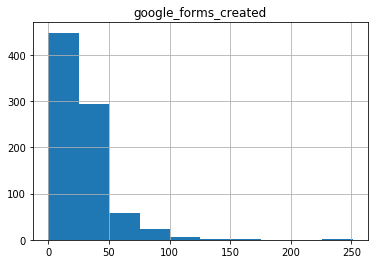

In [7]:
data1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6266006D8>]],
      dtype=object)

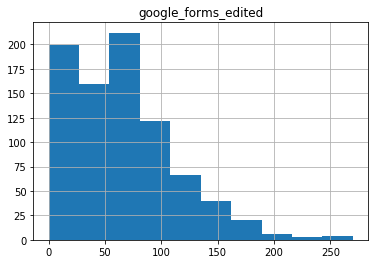

In [8]:
data2.hist()

In [9]:
data1['time'] = pd.to_datetime(data1['time'],utc=True)
data1.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

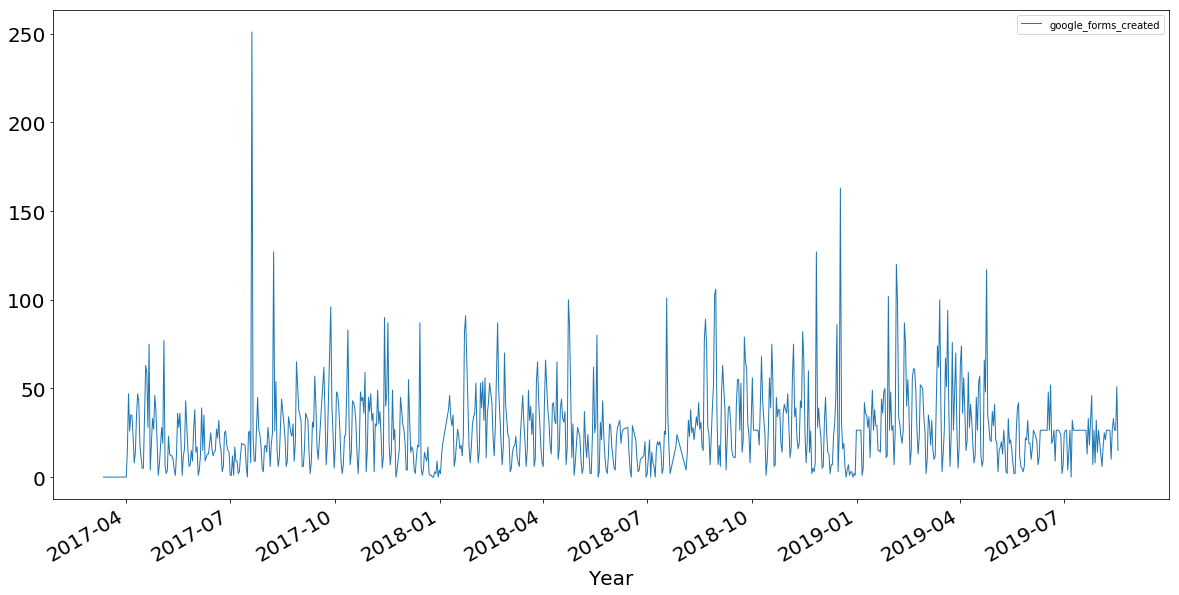

In [10]:
data1.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [11]:
data2['time'] = pd.to_datetime(data2['time'],utc=True)
data2.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

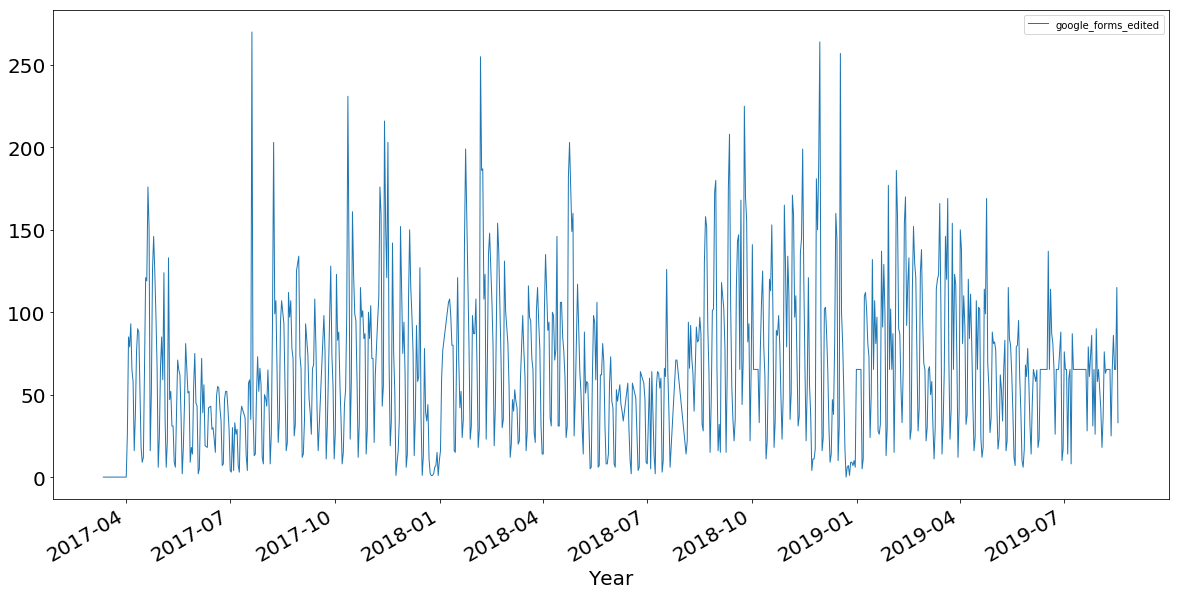

In [12]:
data2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

Distribution fit for the google_forms_created

In [13]:
alpha= norm.fit(df['google_forms_created'])[0]
beta= norm.fit(df['google_forms_created'])[1]
oiu= df['google_forms_created']
density= kde.gaussian_kde(oiu,bw_method=None)

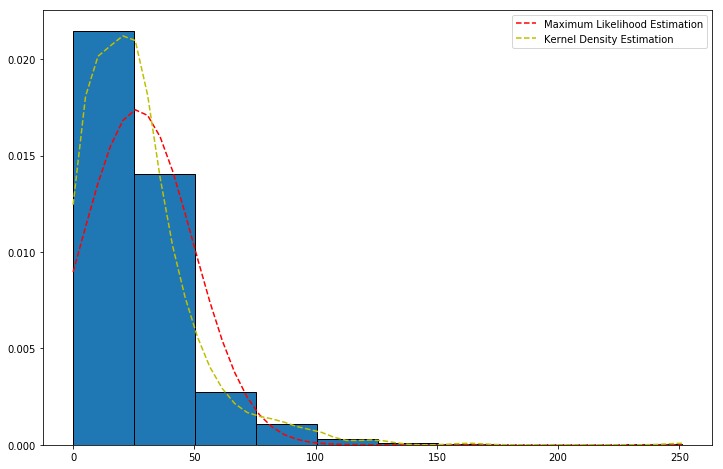

In [14]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [15]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [16]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.0646045407294146, pvalue=0.0018522957764874892)

In [17]:
e= norm(alpha,beta)
kstest(oiu,e.cdf)

KstestResult(statistic=0.12483617437717504, pvalue=9.548140056381271e-12)

Distributions fit for google_forms_edited

In [18]:
alpha= norm.fit(df['google_forms_edited'])[0]
beta= norm.fit(df['google_forms_edited'])[1]
oiu= df['google_forms_edited']
density= kde.gaussian_kde(oiu,bw_method=None)

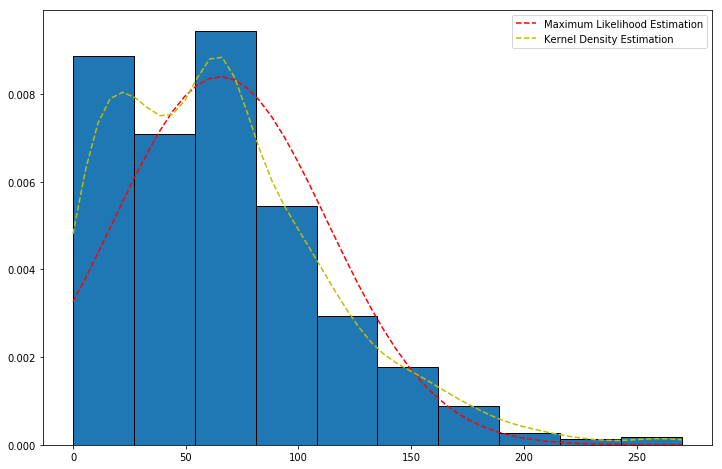

In [19]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [20]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])
kstest(oiu,my_cdf)

KstestResult(statistic=0.04965016088562225, pvalue=0.032122952571952856)

In [21]:
e= norm(alpha,beta)
kstest(oiu,e.cdf)

KstestResult(statistic=0.09830436399223297, pvalue=1.9232447168171518e-07)

In [22]:
data1= df['google_forms_created']
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

27.448644214162353


In [23]:
data1.mean()-users_sample.mean()

-1.0315457685664953

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D626718898>]],
      dtype=object)

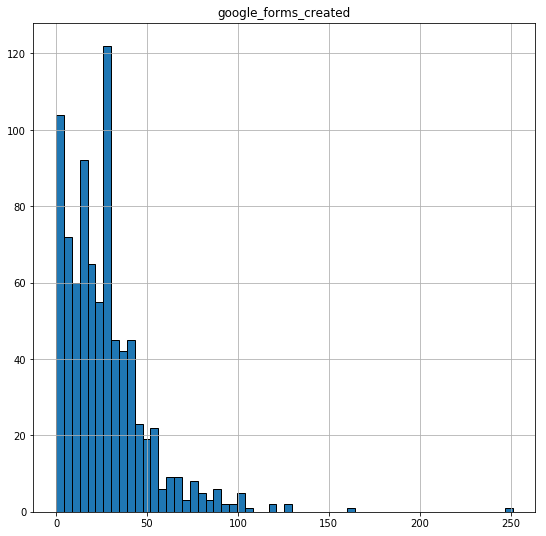

In [24]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D629B53D68>]],
      dtype=object)

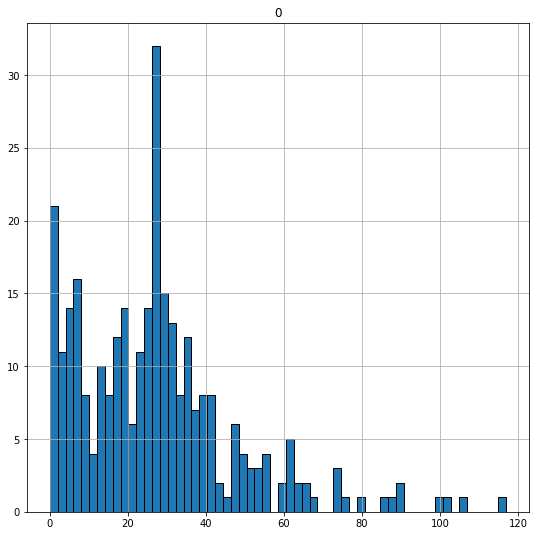

In [25]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

Aplying central limit theorem for the Google_forms_created

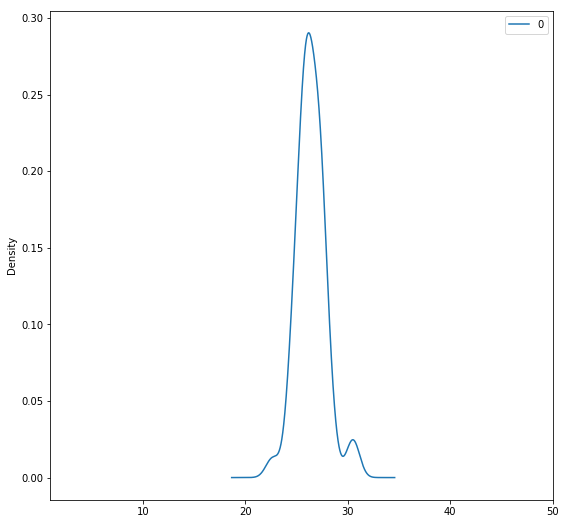

In [26]:
point_estimates = []         # Make empty list to hold point estimates
data1=df['google_forms_created']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data1, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(1,50)) 

In [27]:
data1.mean()- np.array(point_estimates).mean()

-0.012748704663213317

In [28]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
25.391424870466324
Confidence interval:
(22.79303811794517, 27.989811622987478)


Creating Many samples so that we have many confidence intervals for google_forms_created.

In [29]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plot the confidence intervals for google_forms_created

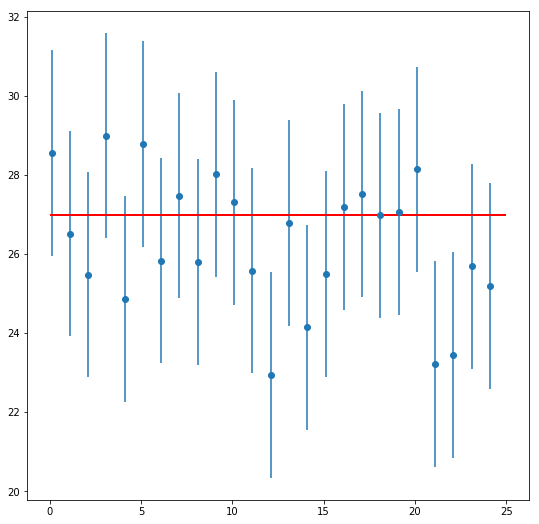

In [30]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=27, 
           linewidth=2.0,
           color="red")

T critical value for google_forms_created

In [31]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(22.955186712973127, 27.82766302795952)


In [32]:
# Check the difference between critical values with a sample size of 200
             
stats.t.ppf(q=0.975, df= 200) - stats.norm.ppf(0.975)  

0.01193223909155483

In [33]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(22.955186712973127, 27.82766302795952)

Applying central limit theorem for the google forms edited

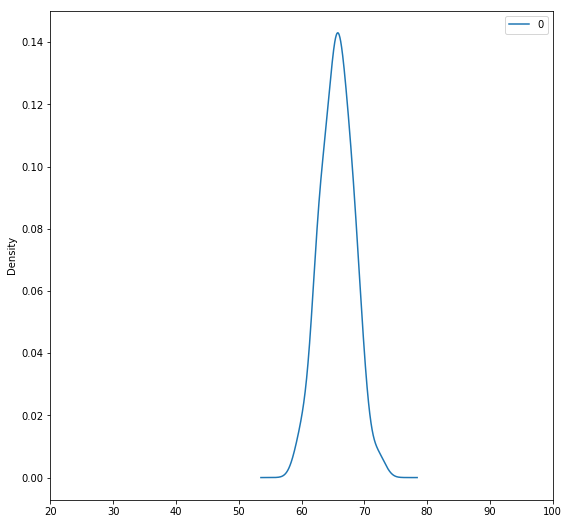

In [34]:
point_estimates = []         # Make empty list to hold point estimates
data2=df['google_forms_edited']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data2, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(20,100)) 

In [35]:
data2.mean()- np.array(point_estimates).mean()

-0.30541692573422097

Confidence interval for google_forms_edited

In [36]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
63.909240069084625
Confidence interval:
(61.310853316563474, 66.50762682160578)


Creating Many samples so that we have many confidence intervals.

In [37]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data2, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

Plotting the confidence intervals for all samples of google forms edited

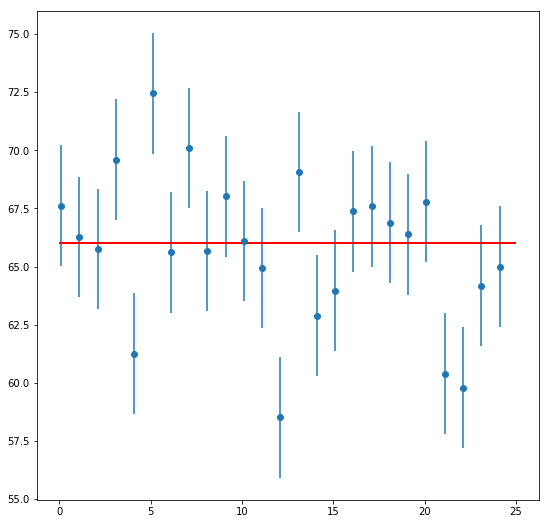

In [38]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=66, 
           linewidth=2.0,
           color="red")

T critical value for  google forms edited

In [39]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(58.52290640050798, 69.29557373766127)


In [40]:
# Check the difference between critical values with a sample size of 200
             
stats.t.ppf(q=0.975, df= 200) - stats.norm.ppf(0.975)  

0.01193223909155483

In [41]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(58.52290640050798, 69.29557373766127)

Point estimates and 
point estimate proportions

In [51]:
#df[df['google_forms_created'].value_counts].sum()
pd.DataFrame(df.groupby('time')['google_forms_created'].count()).sum()

google_forms_created    831
dtype: int64

In [56]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.831                              # Point estimate of proportion

n = 300                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.7885936075840971, 0.8734063924159028)

In [57]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.831,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.7885936075840971, 0.8734063924159028)

Covariance and correlation
Calcualting correlation and covariance for google_forms_created and google_forms_edited

In [60]:

data1=df['google_forms_created']
data2=df['google_forms_edited']
np.cov(data1, data2)[0,1]

933.1649353892254

In [61]:
print('Covariance of X and Y: %.2f'%np.cov(data1, data2)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(data1, data2)[0, 1])

Covariance of X and Y: 933.16
Correlation of X and Y: 0.85


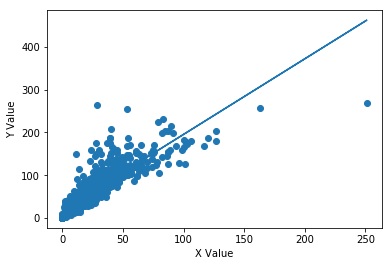

Correlation of X and Y: 0.85


In [62]:
X = data1
Y = data2

m, b = np.polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, '-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

Hypothesis testing

In [65]:
datasample_forms_created= np.random.choice(a= data1, size = 300)

In [67]:
datasample_forms_edited= np.random.choice(a= data2, size = 300)

My Hypothesis is that mean of google_forms_created varies a lot from the google_forms_edited.

In [68]:
print(data1.mean())
print(datasample_forms_created.mean())

26.417098445595858
24.436416234887734


In [69]:
print(data2.mean())
print(datasample_forms_edited.mean())

65.31088082901536
68.10901554404145


We see the mean values have slight difference, we conduct the 1sample ttest for our null hypothesis, 
The p value is > 0.05, so we fail to reject the null hypothesis.

In [70]:
stats.ttest_1samp(a = data1, popmean = data2.mean())

Ttest_1sampResult(statistic=-48.82748576710275, pvalue=3.114647826090422e-246)

In [72]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=299)  # Degrees of freedom

-1.9679296690653623

In [74]:
stats.t.cdf(x= -48.82748576710275,#T-test statistic
            df= 299)*2

1.6606698683753255e-144

In [76]:
sigma = data1.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 80,                     # Degrees of freedom
                 loc = data1.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(19.954632840976327, 32.87956405021539)

In [77]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 80,                     # Degrees of freedom
                 loc = data1.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(17.848302585578445, 34.98589430561327)

Two sample are created from the original forms creted and the forms edited data, they are tested for independent ttest and relative ttest

In [81]:
datasample1= np.random.choice(a= data1, size = 300)
datasample2= np.random.choice(a= data2, size= 300)
print(datasample1.mean())
print(datasample2.mean())

26.42003454231434
66.71405872193436


In [82]:
stats.ttest_ind(a= datasample1,
                b= datasample2,
                equal_var=False) 

Ttest_indResult(statistic=-13.315645260414923, pvalue=9.458803982817742e-34)

In [80]:
stats.ttest_rel(a= datasample1,
               b= datasample2)

Ttest_relResult(statistic=-11.318069596345403, pvalue=5.899255734216416e-25)